## 2. Regression

#### Importer

In [90]:

import csv
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import IPython


#### Läs in data

In [15]:
data = pd.read_csv('../datasets/housing.csv', delim_whitespace=True, header=None)

In [16]:
data.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [17]:
df = pd.DataFrame(data)

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [19]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [88]:
# Delar upp i test och train sets
train_dataset = df.sample(frac=0.7,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [53]:
# Delar upp i X och y
X_train = train_dataset.iloc[:,:-1]
y_train = train_dataset.iloc[:,-1]
X_test = test_dataset.iloc[:,:-1]
y_test = test_dataset.iloc[:,-1]


In [54]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.09103,0.0,2.46,0,0.488,7.155,92.2,2.7006,3,193.0,17.8,394.12,4.82
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666.0,20.2,375.87,16.74
80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281.0,19.0,396.90,5.29
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222.0,18.4,396.90,7.53


In [56]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
3train_stats

,count,mean,std,min,25%,50%,75%,max
0,354.0,3.767375,9.418497,0.00906,0.082757,0.274475,3.077295,88.9762
1,354.0,11.079096,23.070178,0.00000,0.000000,0.000000,12.500000,95.0000
2,354.0,11.185254,6.646944,0.74000,5.860000,9.795000,18.100000,27.7400
3,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
4,354.0,0.554098,0.115748,0.38500,0.453000,0.538000,0.624000,0.8710
5,354.0,6.265791,0.699380,3.56100,5.878250,6.175000,6.605500,8.7800
6,354.0,68.057627,27.953167,6.00000,45.100000,76.500000,93.750000,100.0000
7,354.0,3.844439,2.187514,1.12960,2.073700,3.207450,5.214600,12.1265
8,354.0,9.440678,8.569207,1.00000,4.000000,5.000000,20.000000,24.0000
9,354.0,407.500000,162.296676,187.00000,287.000000,337.000000,666.000000,711.0000


In [108]:
# Nomarlizing the data
norm_train_data = (X_train - train_stats['mean']) / train_stats['std']
norm_test_data = (X_test - train_stats['mean']) / train_stats['std']

In [106]:
norm_train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
329,-0.392858,-0.480235,-1.195324,-0.275269,-0.812953,0.096098,-1.819387,0.626356,-0.634910,0.138635,-0.726275,0.234841,-0.751260
371,0.580233,-0.480235,1.040289,-0.275269,0.664389,-0.071193,1.142710,-1.223004,1.699028,1.592762,0.808798,0.140233,-0.439304
219,-0.387867,-0.480235,0.406916,3.622544,-0.035405,0.153292,0.870827,-0.219948,-0.518213,-0.810245,-0.958862,0.428337,-0.301132
403,2.233299,-0.480235,1.040289,-0.275269,1.200033,-1.310863,0.999614,-0.979029,1.699028,1.592762,0.808798,0.461334,1.019339
78,-0.394003,-0.480235,0.247444,-0.275269,-1.011659,-0.048316,-0.513631,0.534699,-0.518213,-0.058535,0.111037,0.351690,-0.039032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,-0.390332,-0.480235,-1.312671,-0.275269,-0.571049,1.271425,0.863672,-0.522894,-0.751607,-1.321654,-0.307619,0.432305,-1.110223
453,0.475736,-0.480235,1.040289,-0.275269,1.372821,1.611727,1.117668,-0.636219,1.699028,1.592762,0.808798,0.241733,0.587729
80,-0.395631,0.603416,-0.951603,-0.275269,-1.106693,0.659454,-1.236269,0.711429,-0.634910,-0.779437,0.250589,0.461334,-1.043273
307,-0.394761,0.950184,-1.354796,-0.275269,-0.709280,0.833895,0.080219,-0.302507,-0.284820,-1.142969,-0.028515,0.461334,-0.724195


In [113]:
norm_test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.399326,0.299994,-1.335238,-0.275269,-0.139078,0.442119,-0.102229,0.112256,-0.985001,-0.687013,-1.470553,0.461334,-1.087431
9,-0.381944,0.061591,-0.498764,-0.275269,-0.260030,-0.374319,0.638295,1.256066,-0.518213,-0.594590,-1.517071,0.354927,0.639009
11,-0.387525,0.061591,-0.498764,-0.275269,-0.260030,-0.367170,0.530973,1.089027,-0.518213,-0.594590,-1.517071,0.461334,0.093443
23,-0.295052,-0.480235,-0.458143,-0.275269,-0.139078,-0.647418,1.142710,0.114633,-0.634910,-0.619236,1.180937,0.436690,1.035008
25,-0.310754,-0.480235,-0.458143,-0.275269,-0.139078,-0.953403,0.631140,0.278929,-0.634910,-0.619236,1.180937,-0.514812,0.554966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,-0.380528,-0.480235,2.490580,-0.275269,0.474321,-1.217923,1.081894,-0.954983,-0.634910,1.870032,0.762280,-0.090542,1.617611
490,-0.377971,-0.480235,2.490580,-0.275269,0.474321,-1.676902,1.071162,-0.924263,-0.634910,1.870032,0.762280,-0.358073,2.430975
492,-0.388178,-0.480235,2.490580,-0.275269,0.474321,-0.404345,0.552437,-0.792927,-0.634910,1.870032,0.762280,0.461334,0.104838
493,-0.381596,-0.480235,-0.224954,-0.275269,0.266975,-0.798981,-0.502899,-0.668676,-0.401516,-0.101666,0.343624,0.461334,-0.086039


#### Building model

In [128]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())], name='hidden-1'),
    layers.Dense(32, activation='relu' , name='hidden-2'),
    layers.Dense(16, activation='relu', name='hidden-3'),
    layers.Dense(1, name='output')
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [132]:
model = build_model()

In [133]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 64)                896       
                                                                 
 hidden-2 (Dense)            (None, 32)                2080      
                                                                 
 hidden-3 (Dense)            (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


#### Training the model

In [134]:
EPOCHS = 30

fit_model = model.fit(
  norm_train_data, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/30
9/9 [==============================] - 1s 20ms/step - loss: 533.5164 - mae: 21.4219 - mse: 533.5164 - val_loss: 648.0339 - val_mae: 23.4459 - val_mse: 648.0339
Epoch 2/30
9/9 [==============================] - 0s 6ms/step - loss: 509.1130 - mae: 20.8445 - mse: 509.1130 - val_loss: 618.8318 - val_mae: 22.7812 - val_mse: 618.8318
Epoch 3/30
9/9 [==============================] - 0s 4ms/step - loss: 477.2926 - mae: 20.0433 - mse: 477.2926 - val_loss: 576.6693 - val_mae: 21.8234 - val_mse: 576.6693
Epoch 4/30
9/9 [==============================] - 0s 4ms/step - loss: 432.6047 - mae: 18.9039 - mse: 432.6047 - val_loss: 517.4372 - val_mae: 20.4923 - val_mse: 517.4372
Epoch 5/30
9/9 [==============================] - 0s 5ms/step - loss: 371.7027 - mae: 17.2304 - mse: 371.7027 - val_loss: 437.5193 - val_mae: 18.6959 - val_mse: 437.5193
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 293.6616 - mae: 14.9217 - mse: 293.6616 - val_loss: 338.1434 - val_mae: 16.2315

In [137]:
hist = pd.DataFrame(fit_model.history)
hist['epoch'] = fit_model.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
25,17.158016,2.884073,17.158016,13.384550,2.750950,13.384550,25
26,16.838181,2.875233,16.838181,12.990587,2.710091,12.990587,26
27,16.547483,2.843197,16.547483,12.307996,2.626617,12.307996,27
28,16.284483,2.811671,16.284483,12.394213,2.640077,12.394213,28
29,16.194191,2.837858,16.194191,12.012277,2.611852,12.012277,29


#### Plot the result

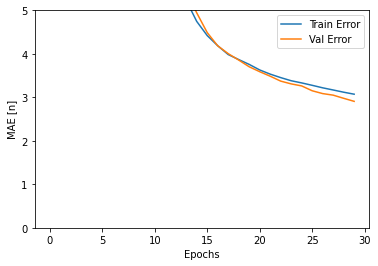

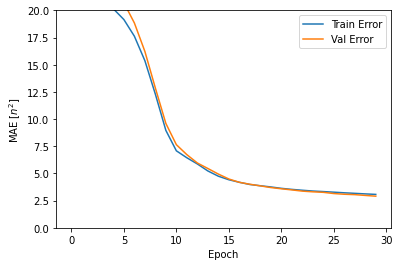

In [138]:
def plot_history(fit_model):
    hist = pd.DataFrame(fit_model.history)
    hist['epoch'] = fit_model.epoch

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('MAE [n]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE [$n^2$]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

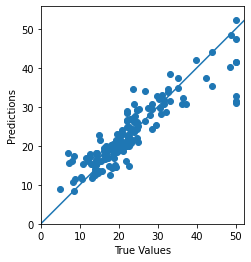

In [139]:
test_predictions = model.predict(norm_test_data).flatten()
train_predictions = model.predict(norm_train_data).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## 3. Klassificering

#### Importer

In [176]:
import torch
import torchvision
import torch.nn as nn 
from torchvision.utils import make_grid
import torchvision.transforms as transforms

#### Kollar om GPU är tillgängligt

In [161]:
torch.cuda.is_available()

False

In [162]:
device = torch.device('cpu')

In [164]:
device

device(type='cpu')

In [149]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001 

#### Laddar in datasetet

In [150]:
train_dataset = torchvision.datasets.MNIST(root='../datasets/', 
                                            train=True, 
                                       transform=transforms.ToTensor(),  
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='../datasets/', 
                                           train=False, 
                                           transform=transforms.ToTensor()) 

In [151]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

images.shape: torch.Size([100, 1, 28, 28])


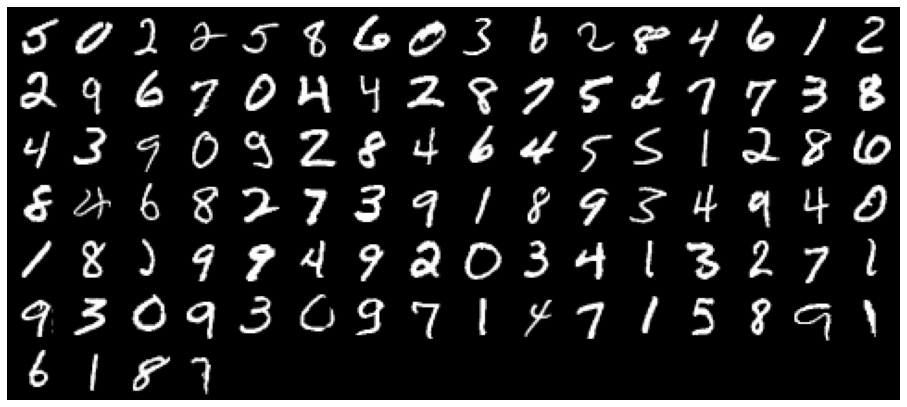

In [181]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

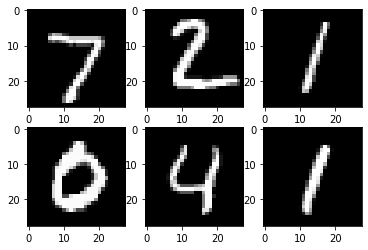

In [152]:
examples = iter(test_loader)
example_data, example_targets = examples.next()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

#### Bygger modellen

In [153]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out 

In [166]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [167]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [168]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
         # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
         # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step[100/600], Loss: 0.3695
Epoch [1/2], Step[200/600], Loss: 0.2140
Epoch [1/2], Step[300/600], Loss: 0.1699
Epoch [1/2], Step[400/600], Loss: 0.2284
Epoch [1/2], Step[500/600], Loss: 0.1065
Epoch [1/2], Step[600/600], Loss: 0.1484
Epoch [2/2], Step[100/600], Loss: 0.0912
Epoch [2/2], Step[200/600], Loss: 0.1105
Epoch [2/2], Step[300/600], Loss: 0.1517
Epoch [2/2], Step[400/600], Loss: 0.1236
Epoch [2/2], Step[500/600], Loss: 0.1146
Epoch [2/2], Step[600/600], Loss: 0.0677


In [169]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
         # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item() 
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.01 %
